In [ ]:
# Please run our code on Colab and upload the files needed
import numpy as np 
import nltk
import string
import math
nltk.download("stopwords")
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(2022)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vocab= {}
with open('/content/imdb.vocab', 'r') as f:
    vocab_idx= 0
    for line in f.readlines():
        line= line.strip('\n')
        vocab[vocab_idx]= (line, 0, list(), list())
        vocab_idx+= 1
print(len(vocab))

89527


In [ ]:
# Update the dictionary to identify the rare and stopwords
# Note the dataframe is constructed in a separate cell as the program always crashes when they are done together
with open('/content/labeledBowTrain.feat', 'r') as f:
    lines= f.readlines()
    train_len= len(lines)
    for line in lines:
        raw= line.split()
        rating= int(raw[0])
        for tok in raw[1:]:
            splt= tok.split(':')
            ele= int(splt[0])
            vocab[ele]= (vocab[ele][0], vocab[ele][1]+ 1, vocab[ele][2]+ [int(splt[1])], vocab[ele][3]+ [rating])

In [ ]:
print(vocab[12852])
print(train_len)

('sylvester', 15, [1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1], [10, 10, 10, 10, 8, 9, 7, 7, 1, 3, 3, 4, 3, 2, 1])
25000


In [ ]:
with open('/content/labeledBowTest.feat', 'r') as f:
    lines= f.readlines()
    test_len= len(lines)
    for line in lines:
        raw= line.split()
        for tok in raw[1:]:
            splt= tok.split(':')
            ele= int(splt[0])
            vocab[ele]= (vocab[ele][0], vocab[ele][1]+ 1, vocab[ele][2]+ [int(splt[1])], vocab[ele][3]+ [rating])

In [ ]:
print(test_len)

25000


In [ ]:
# Filter out the words that are rare or too common
print(len(vocab))
stop_words = set(stopwords.words('english'))
whole_len= train_len+ test_len
word_list= []
for entry in vocab:
    percent= vocab[entry][1]/ whole_len
    if percent< 0.01 or (vocab[entry][0] in string.punctuation) or percent> 0.6 or (vocab[entry][0] in stop_words): 
        # We should also get rid of the punctuation marks and some common stop words provided by the nltk library
        word_list.append(entry)
# Pop out the identified words
for idx in word_list:
    vocab.pop(idx)
print(len(vocab))

89527
1619


In [ ]:
# A glimpse of what words have been dropped
print(word_list[0: 100])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 54, 55, 56, 59, 60, 63, 65, 66, 67, 68, 69, 70, 73, 76, 78, 80, 81, 82, 85, 86, 87, 88, 89, 91, 92, 96, 97, 98, 108, 113, 117, 120, 122, 125, 128, 129, 130, 133, 134, 136, 139, 140, 143, 147, 148, 154, 155, 165, 167, 168, 183]


In [ ]:
# Now compute the z- score
a1= np.array(len(vocab))
z_scores= []
for entry in vocab:
    num= vocab[entry][1]
    appearances= np.array(vocab[entry][2])
    app_mean= np.mean(appearances)
    app_std= np.std(appearances)
    ratings= np.array(vocab[entry][3])
    rat_mean= np.mean(ratings)
    rat_std= np.std(ratings)
    computed_score= np.inner((appearances- app_mean)/app_std, (ratings- rat_mean)/rat_std)/ math.sqrt(num)
    z_scores.append((entry, computed_score, abs(computed_score), np.mean(appearances), np.std(appearances), np.mean(ratings), np.std(ratings)))
# Sort the tuple list based on their z-score
z_scores_sorted= sorted(z_scores, key=lambda tup: tup[2])

In [ ]:
z_scores_sorted_pos_neg= sorted(z_scores, key=lambda tup: tup[1])

In [ ]:
print('Most Negative words')
for entry in z_scores_sorted_pos_neg[:10]:
    print(vocab[entry[0]][:2], entry[1])
    
print('Most Positive words')
for entry in z_scores_sorted_pos_neg[-10:][::-1]:
    print(vocab[entry[0]][:2], entry[1])

Most Negative words
('bad', 11662) -12.541855942250658
('even', 16696) -4.985337615916012
('horrible', 2100) -4.875031147159681
('book', 2672) -4.194175902571982
('wrong', 3109) -4.186499512232363
('worse', 2568) -4.072745712079182
('waste', 2526) -3.9853926285867183
('like', 22824) -3.930962484424543
('worst', 4418) -3.90511614881379
('funny', 6321) -3.6466158083519438
Most Positive words
('life', 8673) 7.838729678904284
('great', 12543) 7.083325508271831
('best', 9609) 6.372434948453572
('series', 3675) 6.154261379511176
('holes', 653) 6.027474022678127
('well', 14090) 5.212363154743691
('skip', 502) 5.082046417988907
('though', 6998) 5.0672633106045515
('story', 14716) 4.953584174402963
('early', 2686) 4.839558476686666


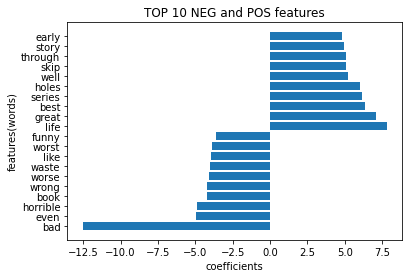

In [ ]:
features = ('bad','even','horrible','book','wrong','worse','waste','like','worst','funny','life','great','best','series','holes','well','skip','through','story','early')
perform=[]
for entry in z_scores_sorted_pos_neg[:10]:
    perform.append(entry[1])
for entry in z_scores_sorted_pos_neg[-10:][::-1]:
    perform.append(entry[1])

plt.barh(features,perform)
plt.ylabel('features(words)')
plt.xlabel('coefficients')
plt.title('TOP 10 NEG and POS features')

plt.show()

In [ ]:
print(len(z_scores_sorted))

1619


In [ ]:
print(z_scores_sorted[::-1][0], vocab[z_scores_sorted[::-1][0][0]][0])
for entry in z_scores_sorted[::-1][:100]:
    print(vocab[entry[0]][:2], entry[1])

(77, -12.541855942250658, 12.541855942250658, 1.5601955067741382, 1.0707778237578192, 2.8443663179557537, 2.3038842044019683) bad
('bad', 11662) -12.541855942250658
('life', 8673) 7.838729678904284
('great', 12543) 7.083325508271831
('best', 9609) 6.372434948453572
('series', 3675) 6.154261379511176
('holes', 653) 6.027474022678127
('well', 14090) 5.212363154743691
('skip', 502) 5.082046417988907
('though', 6998) 5.0672633106045515
('even', 16696) -4.985337615916012
('story', 14716) 4.953584174402963
('horrible', 2100) -4.875031147159681
('early', 2686) 4.839558476686666
('jane', 534) 4.8302942344201805
('still', 8591) 4.800906634664075
('star', 2869) 4.789436943182649
('oscar', 1090) 4.5878319428676155
('case', 2657) 4.3718019779890245
('animals', 540) 4.201949267155053
('book', 2672) -4.194175902571982
('wrong', 3109) -4.186499512232363
('brother', 1544) 4.1692103305770924
('father', 2603) 4.150384651372272
('red', 1035) 4.138068484725281
('also', 12748) 4.120497572548059
('future', 

In [ ]:
# Select the first 500 features that have the highest z scores
selected= z_scores_sorted[::-1][:500]

In [ ]:
print(selected[0])

(77, -12.541855942250658, 12.541855942250658, 1.5601955067741382, 1.0707778237578192, 2.8443663179557537, 2.3038842044019683)


In [ ]:
# Word filtering on the training and testing data

train_features= []
train_ratings= []
train_labels= []
with open('/content/labeledBowTrain.feat', 'r') as f:
    for line in f.readlines():
        raw= line.split()
        rating= int(raw[0])
        label= 1 if rating>= 7 else 0 # Pos(1): rating>= 7 else Neg(0) 
        feature= [0]* len(selected)
        idx= {}
        for tok in raw[1:]:
            splt= tok.split(':')
            idx[int(splt[0])]= int(splt[1])* 1.0 # Convert integer to double
        for i, entry in zip(range(len(selected)), selected):
            feature[i]= idx[entry[0]] if entry[0] in idx else 0* 1.0
        train_features.append(feature)
        train_ratings.append(rating)
        train_labels.append(label)

In [ ]:
test_features= []
test_ratings= []
test_labels= []
with open('/content/labeledBowTest.feat', 'r') as f:
    for line in f.readlines():
        raw= line.split()
        rating= int(raw[0])
        label= 1 if rating>= 7 else 0 # Pos(1): rating>= 7 else Neg(0) 
        feature= [0]* len(selected)
        idx= {}
        for tok in raw[1:]:
            splt= tok.split(':')
            idx[int(splt[0])]= int(splt[1])* 1.0 # Convert integer to double
        for i, entry in zip(range(len(selected)), selected):
            feature[i]= idx[entry[0]] if entry[0] in idx else 0* 1.0
        test_features.append(feature)
        test_ratings.append(rating)
        test_labels.append(label)    

In [ ]:
train_X= np.array(train_features)
train_y= np.array(train_labels)
print(train_X.shape, train_y.shape)

(25000, 500) (25000,)


In [ ]:
test_X= np.array(test_features)
test_y= np.array(test_labels)
print(test_X.shape, test_y.shape)

(25000, 500) (25000,)


In [ ]:
class LogisticRegression:
    
    def __init__(self, dim, learning_rate= 0.001, epsilon=1e-6, max_iters=1e5):
        self.learning_rate = learning_rate
        self.epsilon = epsilon   # Tolerance                  
        self.max_iters = max_iters  # Maximum iteration
        self.weight= np.zeros(dim)
        self.bias= 0
        
    def gradient(self, x, y):
        Num,Dim = x.shape
        y_hat = 1/(1+ np.exp(-np.dot(x, self.weight).astype(float)- self.bias))
        return np.dot(x.T, y_hat - y)/Num, np.sum((y_hat - y))/Num 
        
    def fit(self, x, y):
        N = x.shape[0]
        g1 = np.inf 
        g2= 0
        t = 0
        gb= 0 # The gradient for bias
        running_cost= []
        while np.linalg.norm(g1- g2) > self.epsilon and t < self.max_iters:
            g1= g2
            g2, gb = self.gradient(x, y) # g2 is the gradient for the weights, gb is the gradient for the bias 
            self.weight-= self.learning_rate * g2
            self.bias-= self.learning_rate* gb
            
            # Calculate the cost
            z= np.dot(x, self.weight).astype(float)+ self.bias
            J= np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
            running_cost.append(J)
            t += 1
        print(t)
        return self, running_cost
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None] # If we onl

        return 1/(1+ np.exp(-np.dot(x, self.weight).astype(float)- self.bias)) 

    def check_grad(self, X, y):
          D = X.shape[1]

          diff = np.zeros(D)

          weight = self.weight.copy()

          for i in range(D):
                  epsilon = np.zeros(D)
                  epsilon[i] = np.random.rand() * 1e-4

                  self.weight = self.weight + epsilon
                  z= np.dot(X, self.weight).astype(float)+ self.bias
                  J1= np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
                  self.weight = weight

                  self.weight = self.weight - epsilon
                  z= np.dot(X, self.weight).astype(float)+ self.bias
                  J2= np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
                  self.weight = weight

                  numeric_grad = (J1 - J2) / (2 * epsilon[i])
                  derived_grad = self.gradient(X, y)[0][i]

                  diff[i] = np.square(derived_grad - numeric_grad).sum() / \
                              np.square(derived_grad + numeric_grad).sum()

          # print(diff)
          return diff.sum()

In [ ]:
def evaluate(pred_X, targets):
    counter= 0
    for i in range(len(targets)):
        pred= 1 if pred_X[i]> 0.5 else 0
        counter+= 1 if pred== targets[i] else 0
    return (counter/len(targets))

In [ ]:
def normalize(X):
    
    _, n = X.shape # Get the number of features

    for i in range(n):
        X[:, i] = (X[:, i] - X[:, i].mean())/X[:, i].std()
        
    return X

In [ ]:
# Normalize and shuffle the data
train_X= normalize(train_X)
indices= list(range(len(train_X)))
np.random.shuffle(indices) 
train_X= train_X[indices]
train_y= train_y[indices]

In [ ]:
test_X= normalize(test_X)
indices= list(range(len(test_X)))
np.random.shuffle(indices) 
test_X= test_X[indices]
test_y= test_y[indices]

In [ ]:
logistic= LogisticRegression(dim= len(selected), learning_rate= 0.001, epsilon=1e-6, max_iters=1e5)
logistic, running_cost= logistic.fit(train_X, train_y)

25145


In [ ]:
print(logistic.check_grad(train_X, train_y))

9.461249860125048e-06


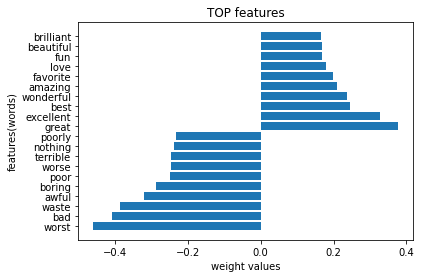

In [ ]:
#plotting the 10 most positive and 10 most negative features sorted by the weights

weight_sorted= sorted(logistic.weight)

weight_arg_sorted= np.argsort(logistic.weight)

perform=[]
for entry in weight_sorted[:10]:
    perform.append(entry)
for entry in weight_sorted[-10:][::-1]:
    perform.append(entry)


features=[]

for entry in weight_arg_sorted[:10]:
    features.append(vocab[selected[entry][0]][0])
for entry in weight_arg_sorted[-10:][::-1]:
    features.append(vocab[selected[entry][0]][0])

plt.barh(features,perform)
plt.ylabel('features(words)')
plt.xlabel('weight values')
plt.title('TOP features')
plt.show()

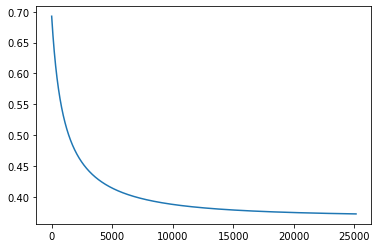

In [ ]:
plt.clf()
plt.plot(running_cost)
plt.show()

In [ ]:
Logistic_results= logistic.predict(test_X)
evaluate(Logistic_results, test_y)

0.82872

In [ ]:
# Split part of the testing data to choose the best hyperparameter for KNN
ten_per_part= int(len(test_X)/ 10)
valid_KNN_X= test_X[:ten_per_part]
valid_KNN_y= test_y[:ten_per_part]
test_KNN_X= test_X[ten_per_part:]
test_KNN_y= test_y[ten_per_part:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Sklearn KNN
ac_list= []
for i in range(1, 101):
    neigh = KNeighborsClassifier(n_neighbors= i).fit(train_X, train_y)
    ac_list.append(evaluate(neigh.predict(valid_KNN_X), valid_KNN_y))

In [ ]:
best_k= np.argmax(np.array(ac_list))
print(best_k+ 1)
neigh = KNeighborsClassifier(n_neighbors= best_k+ 1).fit(train_X, train_y)
KNN_results= neigh.predict(test_KNN_X)
evaluate(KNN_results, test_KNN_y)

30


0.7185777777777778

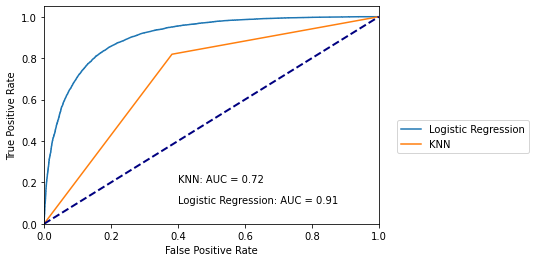

In [ ]:
# Now compute the auroc and the curve
from sklearn.metrics import roc_curve, roc_auc_score
plt.clf()
log_fpr, log_tpr, _ = roc_curve(test_y, Logistic_results)
log_auroc = roc_auc_score(test_y, Logistic_results)
plt.plot(log_fpr, log_tpr, label= "Logistic Regression")
plt.text(0.4, 0.1, "Logistic Regression" + ': AUC = '+ str(round(log_auroc,2)))

knn_fpr, knn_tpr, _ = roc_curve(test_KNN_y, KNN_results)
knn_auroc = roc_auc_score(test_KNN_y, KNN_results)
plt.plot(knn_fpr, knn_tpr, label= "KNN")
plt.text(0.4, 0.2, "KNN" + ': AUC = '+ str(round(knn_auroc,2)))




plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
plt.show()
#plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)
# plt.close()

In [ ]:
# Comparison of KNN and Logistic Regression on 20%, 40%, 60%, 80%, 100%
print(len(train_X))

logistic_auc= []
knn_auc= []

for i in np.arange(0.2, 1.2, 0.2):
    data_span= int(len(train_X)* i)
    partial_X= train_X[:data_span]
    partial_y= train_y[:data_span]
    
    # Logistic Performance
    logistic= LogisticRegression(len(selected), 0.001, 1e-6, 1e5)
    logistic, running_cost= logistic.fit(partial_X, partial_y)
    Logistic_results= logistic.predict(test_X)
    logistic_auc.append(roc_auc_score(test_y, Logistic_results))
    
    # KNN Performance
    neigh = KNeighborsClassifier(n_neighbors= best_k+ 1).fit(partial_X, partial_y)
    KNN_results= neigh.predict(test_KNN_X)
    knn_auc.append(roc_auc_score(test_KNN_y, KNN_results))
    

25000
27350
26202
25704
25414
25145


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


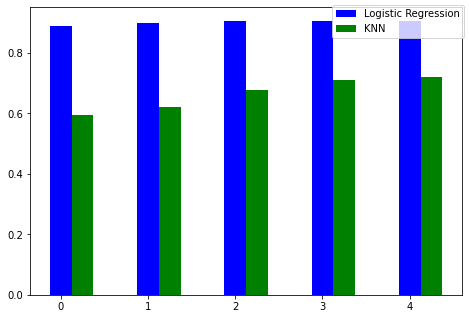

In [ ]:
xx = np.arange(5)
labels= ['20%', '40%', '60%', '80%', '100%']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xx + 0.00, logistic_auc, color = 'b', width = 0.25, label= 'Logistic Regression')
ax.bar(xx + 0.25, knn_auc, color = 'g', width = 0.25, label= 'KNN')
fig.legend()
ax.set_xticks(xx, labels)

Multi-class Logistic Regression

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
categ = ['comp.windows.x','rec.motorcycles', 'sci.space','talk.politics.misc']
four_train = fetch_20newsgroups(subset='train', categories=categ, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

In [ ]:
print(len(four_train.data))
print(four_train.data[50])
print("\n".join(four_train.data[50].split("\n")[:]))
print(four_train.target[50])
print(four_train.target_names)

2249

Or read fixes 9, 10, and 11 to the MIT distribution.  This is a known 
problem - just apply those fixes and set SunPost411FCSLd to YES and 
OSTeenyVersion in mit/config/sun.cf to 3.

In fix-09:

In fix-10:

In fix-11:

Or read fixes 9, 10, and 11 to the MIT distribution.  This is a known 
problem - just apply those fixes and set SunPost411FCSLd to YES and 
OSTeenyVersion in mit/config/sun.cf to 3.

In fix-09:

In fix-10:

In fix-11:
0
['comp.windows.x', 'rec.motorcycles', 'sci.space', 'talk.politics.misc']


In [ ]:
#tokenize according to entire training set
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop_w = set(stopwords.words('english'))
count_vect = CountVectorizer(stop_words=stop_w,max_df=0.5,min_df=0.02)
X_train_counts = count_vect.fit_transform(four_train.data)
len(count_vect.vocabulary_)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


622

In [ ]:
vocab={}
vocab_index=0
for key in count_vect.vocabulary_:
  l1=[0,0,0,0]
  l2=[]
  vocab[vocab_index]=(key,l1,l2)
  for i in range(len(four_train.data)):
    l2.append(float(four_train.data[i].count(key)))
    if key in four_train.data[i]:
      l1[four_train.target[i]] += 1
    else: continue
  vocab_index +=1
print(len(vocab))

622


In [ ]:
for i in range(len(vocab)):
  occ = vocab[i][1]
  occ_sum = occ[0]+occ[1]+occ[2]+occ[3]
  o0,o1,o2,o3=occ[0],occ[1],occ[2],occ[3]
  occ_percent = [o0/occ_sum,o1/occ_sum,o2/occ_sum,o3/occ_sum]
  if occ_percent[0]>0.4 or occ_percent[1]>0.4 or occ_percent[2]>0.4 or occ_percent[3]>0.4:
    continue
  else: vocab.pop(i)
print(len(vocab))

276


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
np.random.seed(2022)
X_train={}
for i in vocab.keys():
  X_train[i]=[vocab[i][0],vocab[i][2]]


In [ ]:
from nltk.corpus.reader import YCOEParseCorpusReader
y0,y1,y2,y3=[],[],[],[]
for i in range(len(four_train.data)):
  y0.append(1 if four_train.target[i]==0 else 0)
  y1.append(1 if four_train.target[i]==1 else 0)
  y2.append(1 if four_train.target[i]==2 else 0)
  y3.append(1 if four_train.target[i]==3 else 0)
Y=[y0,y1,y2,y3]

In [ ]:
from sklearn import metrics
all_scores=[]
for y in Y:
  #print(y)
  score_dict={}
  for key in X_train:
    #print(x)
    score_dict[X_train[key][0]]=metrics.mutual_info_score(y,X_train[key][1])
  all_scores.append(score_dict)
print(all_scores[0])

{'organization': 0.002794781498491948, 'motif': 0.013781226392774144, 'people': 0.01698844306397864, 'interested': 0.0008983301046047785, 'software': 0.010433264957157589, 'running': 0.03291207073140324, 'please': 0.00839804983214262, 'send': 0.008486966066025437, 'mail': 0.02194880868818028, 'request': 0.01023821558101773, 'gets': 0.009048871591072486, 'questions': 0.002754435999013839, 'using': 0.023610182971192353, 'programs': 0.005143755710919176, 'however': 0.0019200609809254402, 'world': 0.002568791548070855, 'changes': 0.0023643811227715365, 'small': 0.0044986335657034296, 'added': 0.004229057785287053, 'release': 0.006299743032781798, 'x11r5': 0.0005930048215418682, 'history': 0.006057842148987039, 'university': 0.0003221140044108355, 'open': 0.008393187448223746, 'set': 0.018841396893164997, 'available': 0.009197757320109025, 'cost': 0.012504647557649257, 'ftp': 0.013313344152725216, 'large': 0.004082239188579534, 'public': 0.002746331863785975, 'written': 0.008184101519048198

In [ ]:

sorted_dict0 = sorted(all_scores[0].items(), key=lambda x: x[1], reverse=True)
sorted_dict1 = sorted(all_scores[1].items(), key=lambda x: x[1], reverse=True)
sorted_dict2 = sorted(all_scores[2].items(), key=lambda x: x[1], reverse=True)
sorted_dict3 = sorted(all_scores[3].items(), key=lambda x: x[1], reverse=True)
word_list= []
top_MI=sorted_dict0[:50]


for tup in sorted_dict0[:50]:
  word_list.append(tup[0])


for tup in sorted_dict1:
  if len(word_list)==100: break
  if tup[0] not in word_list:
    top_MI.append(tup)
    word_list.append(tup[0])

for tup in sorted_dict2:
  if len(word_list)==150: break
  if tup[0] not in word_list:
    top_MI.append(tup)
    word_list.append(tup[0])

for tup in sorted_dict3:
  if len(word_list)==200: break
  if tup[0] not in word_list:
    top_MI.append(tup)
    word_list.append(tup[0])
  

print(top_MI)


[('window', 0.10828399060476714), ('windows', 0.04879008821449331), ('application', 0.04820914520990145), ('server', 0.04353906459809128), ('display', 0.041399801995977516), ('client', 0.03975088147400692), ('code', 0.03901867221148437), ('widget', 0.03881103078098166), ('file', 0.033225921146205394), ('running', 0.03291207073140324), ('bike', 0.03149166330171083), ('11', 0.029787251771665964), ('xterm', 0.0292334895807075), ('color', 0.026918864100758555), ('run', 0.026214950529047067), ('version', 0.02364978664726672), ('using', 0.023610182971192353), ('screen', 0.023371985929673978), ('manager', 0.023354926886397464), ('program', 0.023308167578335537), ('user', 0.02299683022863157), ('text', 0.02281369681650145), ('function', 0.0226770576528653), ('mail', 0.02194880868818028), ('source', 0.02172654747134121), ('work', 0.02077265482012594), ('term', 0.020705208675172854), ('set', 0.018841396893164997), ('appreciated', 0.018325395151001414), ('government', 0.01802763601493592), ('erro

In [ ]:
#build X: NxD
X=[]
for i in range(len(top_MI)):
    word=top_MI[i][0]
    for key in X_train:
      if X_train[key][0] == word:
        X.append(X_train[key][1])
      else: continue
X=np.array(X,dtype=np.float128).transpose()
X=normalize(X, axis=1, norm='l2')
print(len(X))
len(X[0])


2249


200

In [ ]:
#build Y : NxC
Y=np.array(Y).transpose()
print(len(Y[0]))
print(len(Y))

4
2249


In [ ]:
#build test
categ = ['comp.windows.x','rec.motorcycles','sci.space','talk.politics.misc']
four_test = fetch_20newsgroups(subset='test', categories=categ, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

X_test=[]
for i in range(len(top_MI)):
    word=top_MI[i][0]
    l=[]
    for k in range(len(four_test.data)):
      l.append(float(four_test.data[k].count(word)))
    X_test.append(l)
X_test=np.array(X_test,dtype=np.float128).transpose()
X_test=normalize(X_test, axis=1, norm='l2')

len(X_test)

1497

In [ ]:
number_of_features=4
y_test=np.zeros((len(four_test.target),4),int)
for indx in range(len(four_test.target)):
  y_test[indx][four_test.target[indx]]=1

#print(len(y_test[0]))

In [ ]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        self.W = np.zeros((nFeatures, nClasses))
        self.bias= np.zeros(nClasses)

    def predict(self, X):
        y_ = np.matmul(X, self.W)+ self.bias
        y_pred = np.exp(y_)
        return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)

    def grad(self, X, y):
        return np.matmul(X.transpose(), self.predict(X) - y), np.sum(self.predict(X) - y, axis= 0)

    def ce(self, X, y):
        return -np.sum(y * np.log(self.predict(X)))

    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.001, niter=10000):
        N, D= X.shape
        prev_ce=self.ce(X,y)/N
        losses_train = np.zeros(niter)
        for i in range(niter):
            gw, gb= self.grad(X, y)
            self.W = self.W - lr * gw
            self.bias -= lr* gb
            loss_train = self.ce(X, y)/N
            losses_train[i] = loss_train
            if i!= 0 and i% 1000== 0:
              print(f"iter {i}: {sum(losses_train)/(i):.3f}")
            if abs(loss_train-prev_ce) < 0.000001:
              break
            prev_ce= loss_train
        return losses_train 


    def check_grad(self, X, y):
          N, C = y.shape
          D = X.shape[1]

          diff = np.zeros((D, C))

          W = self.W.copy()

          for i in range(D):
              for j in range(C):
                  epsilon = np.zeros((D, C))
                  epsilon[i, j] = np.random.rand() * 1e-4

                  self.W = self.W + epsilon
                  J1 = self.ce(X, y)
                  self.W = W

                  self.W = self.W - epsilon
                  J2 = self.ce(X, y)
                  self.W = W

                  numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                  derived_grad = self.grad(X, y)[0][i, j]

                  diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                              np.square(derived_grad + numeric_grad).sum()

          # print(diff)
          return diff.sum()
      

In [ ]:
D=X.shape[1]
C=Y.shape[1]
mlr = Multinomial_logistic(D, C)
#mlr.W

In [ ]:
ce_train= mlr.fit(X,Y,None,None,lr=0.001,niter=10000)

iter 1000: 0.565
iter 2000: 0.504
iter 3000: 0.475
iter 4000: 0.458
iter 5000: 0.445
iter 6000: 0.436
iter 7000: 0.428
iter 8000: 0.422
iter 9000: 0.417


In [ ]:
def evaluate(y, y_pred):
    accuracy = sum(y_pred.argmax(axis=1) == y.argmax(axis=1))
    accuracy = accuracy / y.shape[0]
    return accuracy

In [ ]:
print(mlr.check_grad(X,Y))

2.8711882597052995e-10


In [ ]:
train_accuracy = evaluate(mlr.predict(X), Y)
#train_accuracy
test_accuracy = evaluate(mlr.predict(X_test), y_test)
test_accuracy

0.7474949899799599

In [ ]:
from operator import mul
from sklearn.linear_model import LogisticRegression


ml= LogisticRegression(multi_class= 'multinomial', max_iter= 10000).fit(X,np.array(four_train.target))
results= ml.predict(X_test)
counter= 0
for e1, e2 in zip(four_test.target, results):
  counter+= 1 if e1== e2 else 0

print(counter/len(results))

0.7535070140280561


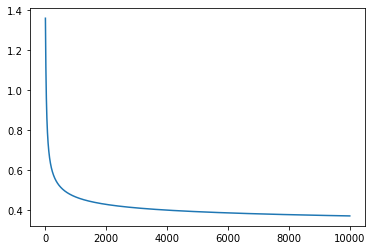

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(ce_train)
plt.show()

A bar plot that shows the classification accuracies of multiclass regression and KNN on the test data (y-axis) as a function of the 20%, 40%, 60%, 80%, and 100% training data (x-axis)

In [ ]:
# Split part of the testing data to choose the best hyperparameter for KNN
ten_per_part= int(len(X_test)/ 5)
mlr_valid_KNN_X= X_test[:ten_per_part]
mlr_valid_KNN_y= y_test[:ten_per_part]
mlr_test_KNN_X= X_test[ten_per_part:]
mlr_test_KNN_y= y_test[ten_per_part:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Sklearn KNN
ac_list= []
for i in range(1, 101):
    neigh = KNeighborsClassifier(n_neighbors= i).fit(X, Y)
    ac_list.append(evaluate(neigh.predict(mlr_valid_KNN_X), mlr_valid_KNN_y))

In [ ]:
print(ac_list)

[0.5986622073578596, 0.5418060200668896, 0.5986622073578596, 0.5618729096989966, 0.5986622073578596, 0.5484949832775919, 0.6020066889632107, 0.5551839464882943, 0.5585284280936454, 0.5284280936454849, 0.5384615384615384, 0.5284280936454849, 0.5384615384615384, 0.5117056856187291, 0.5217391304347826, 0.4916387959866221, 0.5016722408026756, 0.48494983277591974, 0.4983277591973244, 0.47491638795986624, 0.47491638795986624, 0.46153846153846156, 0.4782608695652174, 0.451505016722408, 0.46153846153846156, 0.44481605351170567, 0.45484949832775917, 0.43478260869565216, 0.43812709030100333, 0.4280936454849498, 0.44816053511705684, 0.4280936454849498, 0.43478260869565216, 0.4214046822742475, 0.431438127090301, 0.42474916387959866, 0.4280936454849498, 0.42474916387959866, 0.4280936454849498, 0.4214046822742475, 0.4180602006688963, 0.4180602006688963, 0.4280936454849498, 0.4214046822742475, 0.41471571906354515, 0.411371237458194, 0.411371237458194, 0.41471571906354515, 0.4180602006688963, 0.414715

In [ ]:
mlr_best_k= np.argmax(np.array(ac_list))
print(mlr_best_k+ 1)
neigh = KNeighborsClassifier(n_neighbors= mlr_best_k+ 1).fit(X, Y)
KNN_results= neigh.predict(mlr_test_KNN_X)
evaluate(KNN_results, mlr_test_KNN_y)

7


0.5567612687813022

In [ ]:
from operator import mul
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

def percentized_run(perc,algorithm):
  D=X.shape[1]
  C=Y.shape[1]
  Y_raw= np.array(four_train.target)

  indx = np.random.permutation(X.shape[0])
  
  permuted_X = X[indx]
  permuted_Y = Y[indx]
  permuted_Y_raw = Y_raw[indx]
  newsize=int(np.ceil(perc*X.shape[0]))
  permuted_X=permuted_X[:newsize]
  permuted_Y=permuted_Y[:newsize]
  permuted_Y_raw=permuted_Y_raw[:newsize]
  if(algorithm=="implemented_LR"):
    ce_train= mlr.fit(permuted_X,permuted_Y,None,None,lr=0.005,niter=10000)
    test_accuracy = evaluate(mlr.predict(X_test), y_test)
    return test_accuracy
    '''
  elif(algorithm=="sklearn_LR"):
    ml= LogisticRegression(multi_class= 'multinomial', max_iter= 10000).fit(permuted_X,permuted_Y_raw)
    results= ml.predict(X_test)
    counter= 0
    for e1, e2 in zip(four_test.target, results):
      counter+= 1 if e1== e2 else 0
    return (counter/len(results))
    '''

  elif(algorithm=="KNN"):
    model = KNeighborsClassifier(n_neighbors=mlr_best_k+ 1)
    model.fit(permuted_X,permuted_Y_raw)
    predicted= model.predict(X_test)
    counter=0
    for e1, e2 in zip(four_test.target, predicted):
      counter+= 1 if e1== e2 else 0
    return (counter/len(predicted))

#percentized_run(0.01,"implemented_LR")
print(percentized_run(1,"KNN"))

0.5898463593854375


iter 1000: 0.222
iter 2000: 0.197
iter 3000: 0.184
iter 4000: 0.176
iter 5000: 0.170
iter 6000: 0.165
iter 7000: 0.161
iter 8000: 0.158
iter 9000: 0.156
iter 1000: 0.340
iter 2000: 0.293
iter 3000: 0.271
iter 4000: 0.258
iter 5000: 0.248
iter 6000: 0.241
iter 7000: 0.236
iter 8000: 0.231
iter 9000: 0.227
iter 1000: 0.370
iter 2000: 0.322
iter 3000: 0.300
iter 4000: 0.287
iter 5000: 0.278
iter 6000: 0.271
iter 7000: 0.266
iter 8000: 0.262
iter 9000: 0.259
iter 1000: 0.362
iter 2000: 0.331
iter 3000: 0.315
iter 4000: 0.306
iter 5000: 0.300
iter 6000: 0.295
iter 7000: 0.292
iter 8000: 0.289
iter 1000: 0.351
iter 2000: 0.337
iter 3000: 0.331


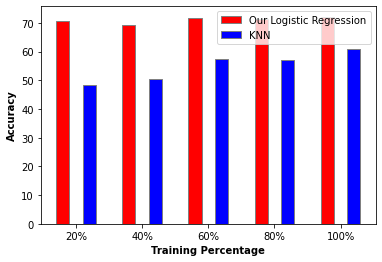

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth= 0.2
# set height of bar
ILR = [percentized_run(0.2,"implemented_LR")*100, percentized_run(0.4,"implemented_LR")*100, percentized_run(0.6,"implemented_LR")*100, percentized_run(0.8,"implemented_LR")*100, percentized_run(1,"implemented_LR")*100]
#SLR = [percentized_run(0.2,"sklearn_LR")*100, percentized_run(0.4,"sklearn_LR")*100, percentized_run(0.6,"sklearn_LR")*100, percentized_run(0.8,"sklearn_LR")*100, percentized_run(1,"sklearn_LR")*100]
SKN = [percentized_run(0.2,"KNN")*100, percentized_run(0.4,"KNN")*100, percentized_run(0.6,"KNN")*100, percentized_run(0.8,"KNN")*100, percentized_run(1,"KNN")*100]
 
# Set position of bar on X axis
br1 = np.arange(len(ILR))
#br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, ILR, color ='r', width = barWidth,
        edgecolor ='grey', label ='Our Logistic Regression')
#plt.bar(br2, SLR, color ='g', width = barWidth,
        #edgecolor ='grey', label ='Sklearn\'s Logistic Regression')
plt.bar(br3, SKN, color ='b', width = barWidth,
        edgecolor ='grey', label ='KNN')
 
# Adding Xticks
plt.xlabel('Training Percentage', fontweight ='bold')
plt.ylabel('Accuracy', fontweight ='bold')
plt.xticks([r + barWidth for r in range(len(ILR))],
        ['20%', '40%', '60%', '80%', '100%'])
 
plt.legend()
plt.show()

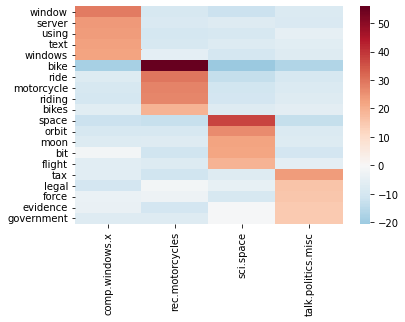

In [ ]:
weight_matrix = mlr.W

class0_w = np.array(weight_matrix[:,0])
class1_w = np.array(weight_matrix[:,1])
class2_w = np.array(weight_matrix[:,2])
class3_w = np.array(weight_matrix[:,3])

index0 = class0_w.argsort()[-5:][::-1]
index1 = class1_w.argsort()[-5:][::-1]
index2 = class2_w.argsort()[-5:][::-1]
index3 = class3_w.argsort()[-5:][::-1]
index_list = np.concatenate((index0,index1,index2,index3))

word_name = []
weights=[]
for idx in index_list:
  weights.append(weight_matrix[idx].tolist())
  word_name.append(top_MI[idx][0])

from seaborn import heatmap
W_hat = weights
class_name=['comp.windows.x','rec.motorcycles', 'sci.space','talk.politics.misc']
hmp = heatmap(W_hat, cmap='RdBu_r', center=0,xticklabels=class_name,yticklabels=word_name)
fig = hmp.get_figure()



